<a href="https://colab.research.google.com/github/Menkallinan/digital-image-processing/blob/main/project/project_part3/Augmented_Fruit_Image_Montage_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf digital-image-processing
!git clone https://github.com/Menkallinan/digital-image-processing.git

Cloning into 'digital-image-processing'...
remote: Enumerating objects: 703, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (241/241), done.
remote: Total 703 (delta 38), reused 218 (delta 14), pack-reused 409 (from 1)
Receiving objects: 100% (703/703), 606.15 MiB | 27.49 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Updating files: 100% (329/329), done.


#  Crie um Jupyter Notebook (NB) para exibir as imagens, organizadas pelas classes. Dica: skimage.util.montage

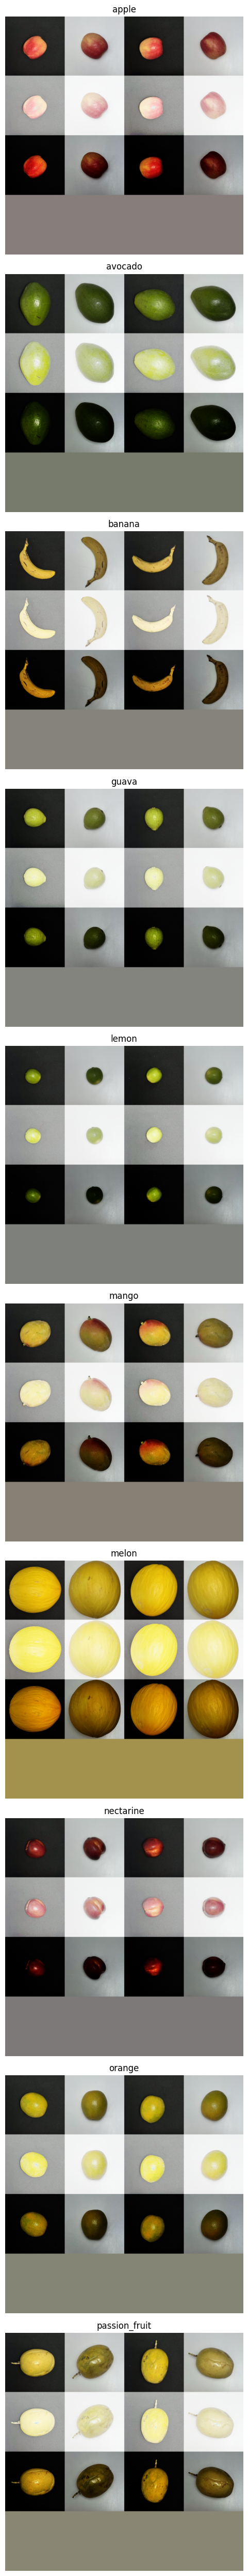

In [2]:
import os
import numpy as np
import skimage.io
import skimage.util
from matplotlib import pyplot as plt

# Diretório base para as frutas
base_dir = "digital-image-processing/project/project_part3/augmented_dataset"

# Classes de frutas (subdiretórios)
ft_class = ['apple', 'avocado', 'banana', 'guava', 'lemon', 'mango', 'melon', 'nectarine', 'orange', 'passion_fruit']

# Versões, cores, e tipos adicionais
ft_version = ['V1', 'V2']  # Versões das imagens
ft_color = ['B', 'W']  # Cores B (colorido) e W (preto e branco)
ft_type = ['cnv', 'log', 'pot']  # Tipos adicionais

fig, axes = plt.subplots(10, 1, figsize=(50, 50))
ax = axes.ravel()

for i, fruit in enumerate(ft_class, start=1):  # O índice começa em 1
    img_fruit = []
    for t in ft_type:
        for ver in ft_version:
            for col in ft_color:
                # Montar o caminho para a imagem de cada fruta, tipo, versão e cor
                img_path = f'{base_dir}/augmented_{fruit}/{t}_0-{str(i).zfill(2)}-{ver}-{col}.png'

                # Verifica se o arquivo existe antes de carregar
                if os.path.exists(img_path):
                    try:
                        img = skimage.io.imread(img_path)

                        # Se a imagem for em escala de cinza (2D), converte para 3 canais
                        if img.ndim == 2:  # Para imagens em preto e branco
                            img = np.stack([img] * 3, axis=-1)
                        elif img.ndim == 3 and img.shape[-1] == 4:  # Para imagens com canal alpha
                            img = img[..., :3]  # Ignora o canal alpha

                        img_fruit.append(img)
                    except OSError as e:
                        print(f"Erro ao carregar a imagem {img_path}: {e}")
                else:
                    print(f"Arquivo não encontrado: {img_path}")  # Depuração

    if img_fruit:  # Só monta se houver imagens
        # Converter lista de imagens para um array numpy
        img_fruit_array = np.array(img_fruit)

        # Criando montagem das imagens, especificando o channel_axis para lidar com imagens coloridas
        m = skimage.util.montage(img_fruit_array, channel_axis=-1)
        ax[i-1].imshow(m)  # Mostra a imagem no subplot
        ax[i-1].set_axis_off()
        ax[i-1].set_title(f"{fruit}")
    else:
        print(f"Nenhuma imagem carregada para {fruit}")  # Depuração

fig.tight_layout()
plt.show()
